In [1]:
from scipy.stats import poisson
import numpy  as np
from numpy.random import gamma
import  matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# Guía 02

## Ejercicio 1

Se observa la realización de $n$ variables aleatorias Poisson independientes de 
parámetro $\lambda$. 
Escribir y graficar la función de Likelihood $L(\lambda)$ para cada caso:

1. ($y_1$, $y_2$, $y_3$) = (3, 7, 19)
1. ($y_1$, $y_2$, $y_3$, $y_4$) = (12, 12, 12, 0)
1. $y_1$ = 12
1. ($y_1$, $y_2$, $y_3$, $y_4$, $y_5$) = (16, 10, 17, 11, 11)


**Rta:**

Para calcular el Likelihood de una función Poisson usamos

$L(\lambda) \propto e^{-n\lambda} \lambda^{\sum_i y_i}$

el máximo res es: 9357622968840174.000000 está en lambda=[10]
el máximo res es: 164408213114736913416192.000000 está en lambda=[12]
el máximo res es: 5225513707333525504.000000 está en lambda=[9]
el máximo res es: 54782414.517690 está en lambda=[12]
el máximo res es: 150375324051726239547837972786747043169173504.000000 está en lambda=[13]


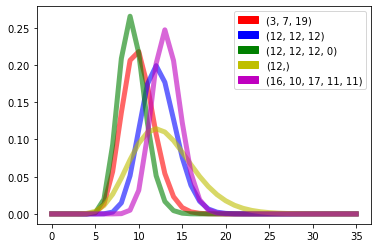

In [2]:

lambdas = list(range(0, 36))
ys = [(3, 7, 19),
     (12, 12, 12), #, 0),
     (12, 12, 12, 0),
     (12,),
     (16, 10, 17, 11, 11)]

res_global = []
fig, ax = plt.subplots(1, 1)
colors = ["r", "b", "g", "y", "m"]
for idx,y in enumerate(ys):
    res = []
    for l in lambdas:
        res.append(np.exp(-len(y)*l) * l**(sum(y)))
    res_global.append(res)

    print(f"el máximo res es: {max(res):02f} está en lambda={[lambdas[idx] for idx,val in enumerate(res) if val==max(res)]}")
    res_norm = [r/sum(res) for r in res]
    ax.plot(lambdas, res_norm,
            f'{colors[idx]}-', lw=5, alpha=0.6)


patch = [mpatches.Patch(color=colors[idx], label=f'{ys[idx]}') for idx in range(len(ys))]
plt.legend(handles=patch)


## Ejercicio 2

Suponiendo un prior $ \lambda \sim Gamma(24,2)$, especificar y graficar la distribución posterior para $\lambda$ correspondiente a cada escenario del ejercicio anterior.

para 0 obtengo: 0 y 0
para 1 obtengo: 0 y 1
para 2 obtengo: 1 y 0
para 3 obtengo: 1 y 1


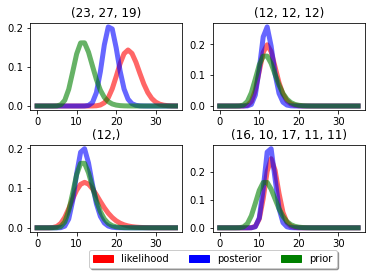

In [3]:
s = 24
r = 2
lambdas = list(range(0, 36))
ys = [(23, 27, 19),
     (12, 12, 12), #, 0),
    #   (12, 12, 12, 0),
      (12,),
      (16, 10, 17, 11, 11)]

res_global = []
fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.4, top=0.85)
colors = ["r", "b", "g", "y", "m"]
for idx,y in enumerate(ys):
    prior = []
    likelihood = []
    posterior = []
    for l in lambdas:
        prior.append(np.exp(-r*l) * l**(s-1))
        likelihood.append(np.exp(-len(y)*l) * l**(sum(y)))
        posterior.append(
            np.exp(-(len(y)+r)*l) * l**(s+sum(y)-1)
            )
    # res_global.append(res)

    prior_norm = [a/sum(prior) for a in prior]
    likelihood_norm = [a/sum(likelihood) for a in likelihood]
    post_norm = [a/sum(posterior) for a in posterior]
    ax[idx//2,idx%2].plot(lambdas, likelihood_norm,
            f'{colors[0]}-', lw=5, alpha=0.6)
    ax[idx//2,idx%2].plot(lambdas, post_norm,
            f'{colors[1]}-', lw=5, alpha=0.6)
    ax[idx//2,idx%2].plot(lambdas, prior_norm,
            f'{colors[2]}-', lw=5, alpha=0.6)

    # plt.xlim([0,20])
    ax[idx//2,idx%2].title.set_text(f"{y}")
    print(f"para {idx} obtengo: {idx//2} y {idx%2}")

patch = [mpatches.Patch(color=colors[idx], label=f'{val}') 
            for idx,val in enumerate(["likelihood", "posterior", "prior"])]
plt.legend(loc='upper center', bbox_to_anchor=(0, -0.15),
          fancybox=True, shadow=True, ncol=5, handles=patch)

# patch = [mpatches.Patch(color=colors[idx], label=f'{ys[idx]}') for idx in range(len(ys))]
# plt.legend(handles=patch)

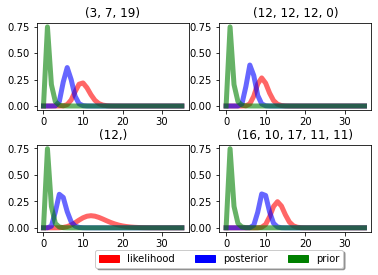

In [4]:
s = 2
r = 2
lambdas = list(range(0, 36))
ys = [(3, 7, 19),
#      (12, 12, 12), #, 0),
     (12, 12, 12, 0),
     (12,),
     (16, 10, 17, 11, 11)]

res_global = []
fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.4, top=0.85)
colors = ["r", "b", "g", "y", "m"]
for idx,y in enumerate(ys):
    prior = []
    likelihood = []
    posterior = []
    for l in lambdas:
        prior.append(np.exp(-r*l) * l**(s-1))
        likelihood.append(np.exp(-len(y)*l) * l**(sum(y)))
        posterior.append(
            np.exp(-(len(y)+r)*l) * l**(s+sum(y)-1)
            )
    # res_global.append(res)

    prior_norm = [a/sum(prior) for a in prior]
    likelihood_norm = [a/sum(likelihood) for a in likelihood]
    post_norm = [a/sum(posterior) for a in posterior]
    ax[idx//2,idx%2].plot(lambdas, likelihood_norm,
            f'{colors[0]}-', lw=5, alpha=0.6)
    ax[idx//2,idx%2].plot(lambdas, post_norm,
            f'{colors[1]}-', lw=5, alpha=0.6)
    ax[idx//2,idx%2].plot(lambdas, prior_norm,
            f'{colors[2]}-', lw=5, alpha=0.6)

    # plt.xlim([0,20])
    ax[idx//2,idx%2].title.set_text(f"{y}")
    # print(f"para {idx} obtengo: {idx//2} y {idx%2}")

patch = [mpatches.Patch(color=colors[idx], label=f'{val}') 
            for idx,val in enumerate(["likelihood", "posterior", "prior"])]
plt.legend(loc='upper center', bbox_to_anchor=(0, -0.15),
          fancybox=True, shadow=True, ncol=5, handles=patch)

# Ejercicio 4
a = "a"
b= "b"



## Ejercicio 5

Supongamos que $\lambda$ es el promedio del número total de goles por partido del mundial de fútbol femenino. En este ejercicio vamos a analizar $\lambda$ usando el modelo Gamma-Poisson donde $Y_i$ es el número de goles que se hicieron en un partido $i$ del Mundial. Es decir que $P(Y_i|\lambda)= Pois(\lambda)$. Como prior, tomar:  $P(\lambda) = Gamma(1, 0.25)$.

1. Graficar el conocimiento previo sobre $\lambda$.
1. ¿Por qué el modelo Poisson es razonable para $Y_i$?
1. Escribir la distribución posterior para $\lambda$ suponiendo que en los primeros tres partidos se meten $(y_1, y_2, y_3)=(3, 7, 4)$ goles.
1. Ahora usando datos reales, graficar la evolución (partido a partido) del conocimiento sobre $\lambda$ . Los datos se pueden obtener:

    ```r
    library(fivethirtyeight)
    library(dplyr)
    
    data("wwc_2019_matches")
    d <- wwc_2019_matches %>% 
      mutate(total = score1 + score2) %>% 
        select(total)
    ```


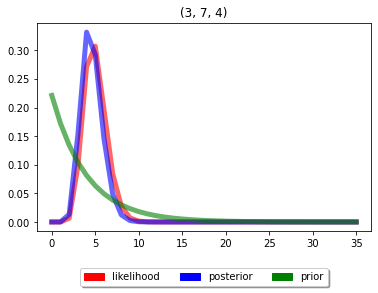

In [9]:
s = 1
r = 0.25
lambdas = list(range(0, 36))
ys = [
        (3, 7, 4),
     ]

res_global = []
fig, ax = plt.subplots(1, 1)
fig.subplots_adjust(hspace=0.4, top=0.85)
colors = ["r", "b", "g", "y", "m"]
for idx,y in enumerate(ys):
    prior = []
    likelihood = []
    posterior = []
    for l in lambdas:
        prior.append(np.exp(-r*l) * l**(s-1))
        likelihood.append(np.exp(-len(y)*l) * l**(sum(y)))
        posterior.append(
            np.exp(-(len(y)+r)*l) * l**(s+sum(y)-1)
            )
    # res_global.append(res)

    prior_norm = [a/sum(prior) for a in prior]
    likelihood_norm = [a/sum(likelihood) for a in likelihood]
    post_norm = [a/sum(posterior) for a in posterior]
    ax.plot(lambdas, likelihood_norm,
            f'{colors[0]}-', lw=5, alpha=0.6)
    ax.plot(lambdas, post_norm,
            f'{colors[1]}-', lw=5, alpha=0.6)
    ax.plot(lambdas, prior_norm,
            f'{colors[2]}-', lw=5, alpha=0.6)

    # plt.xlim([0,20])
    ax.title.set_text(f"{y}")
    # print(f"para {idx} obtengo: {idx//2} y {idx%2}")

patch = [mpatches.Patch(color=colors[idx], label=f'{val}') 
            for idx,val in enumerate(["likelihood", "posterior", "prior"])]
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, handles=patch)

# patch = [mpatches.Patch(color=colors[idx], label=f'{ys[idx]}') for idx in range(len(ys))]
# plt.legend(handles=patch)

In [15]:
partidos = pd.read_csv('data_02_partidos.csv', 
                    )

# display(partidos)
partidos.shape
partidos["goles"] = partidos["score1"] + partidos["score2"]
partidos["goles"]
partidos.shape[0]

52

0 -> (0, 0)
1 -> (0, 1)
2 -> (0, 2)
3 -> (0, 3)
4 -> (0, 4)
5 -> (0, 5)
6 -> (0, 6)
7 -> (0, 7)
8 -> (1, 0)
9 -> (1, 1)
10 -> (1, 2)
11 -> (1, 3)
12 -> (1, 4)
13 -> (1, 5)
14 -> (1, 6)
15 -> (1, 7)
16 -> (2, 0)
17 -> (2, 1)
18 -> (2, 2)
19 -> (2, 3)
20 -> (2, 4)
21 -> (2, 5)
22 -> (2, 6)
23 -> (2, 7)
24 -> (3, 0)
25 -> (3, 1)
26 -> (3, 2)
27 -> (3, 3)
28 -> (3, 4)
29 -> (3, 5)
30 -> (3, 6)
31 -> (3, 7)
32 -> (4, 0)
33 -> (4, 1)
34 -> (4, 2)
35 -> (4, 3)
36 -> (4, 4)
37 -> (4, 5)
38 -> (4, 6)
39 -> (4, 7)
40 -> (5, 0)
41 -> (5, 1)
42 -> (5, 2)
43 -> (5, 3)
44 -> (5, 4)
45 -> (5, 5)
46 -> (5, 6)
47 -> (5, 7)
48 -> (6, 0)
49 -> (6, 1)
50 -> (6, 2)
51 -> (6, 3)


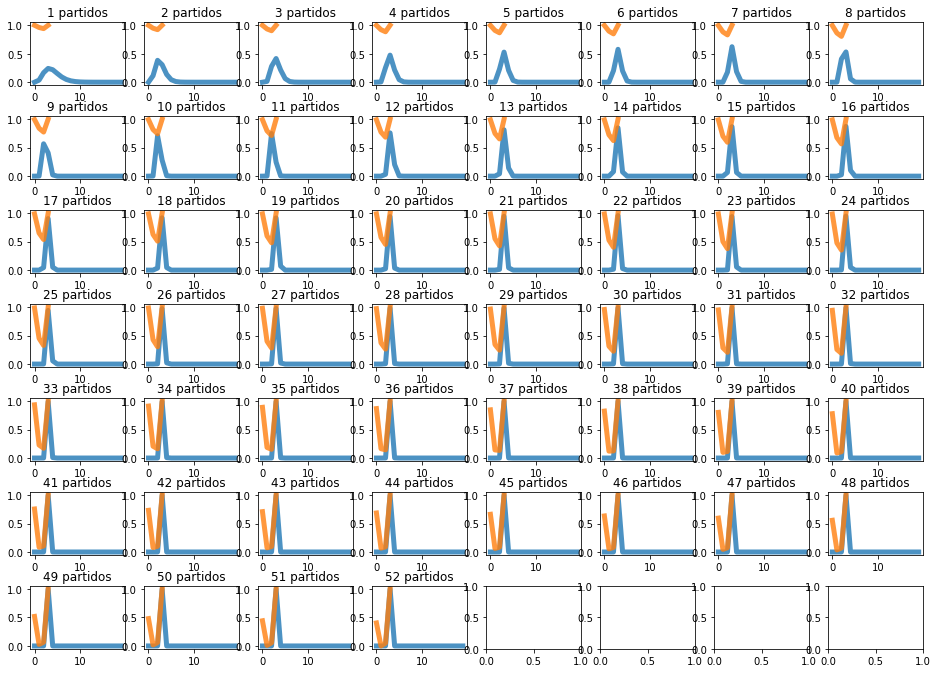

In [41]:
s = 1
r = 0.25
lambdas = list(range(0, 20))

cdict = {'red':   ((0.0,  0.22, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.89, 1.0)),

        #  'green': ((0.0,  0.49, 0.0),
        #            (0.5,  1.0, 1.0),
        #            (1.0,  0.12, 1.0)),

         'blue':  ((0.0,  0.72, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  0.11, 1.0))}
# Reds
n = partidos.shape[0]
colors = plt.cm.Reds(np.linspace(0, 1, n))

res_global = []
fig, ax = plt.subplots(7, 8,figsize=(16,12))
fig.subplots_adjust(hspace=0.5, top=0.85)
# colors = ["r", "b", "g", "y", "m"]
y = []
for idx,y_current in enumerate(partidos["goles"]):
    y.append(y_current)
    prior = []
    likelihood = []
    posterior = []
    for l in lambdas:
        prior.append(np.exp(-r*l) * l**(s-1))
        likelihood.append(np.exp(-len(y)*l) * l**(sum(y)))
        posterior.append(
            np.exp(-(len(y)+r)*l) * l**(s+sum(y)-1)
            )
    # res_global.append(res)

    prior_norm = [a/sum(prior) for a in prior]
    likelihood_norm = [a/sum(likelihood) for a in likelihood]
    post_norm = [a/sum(posterior) for a in posterior]
    # print(f"{idx} -> {(idx//8, idx%8)}")
    ax[idx//8, idx%8].plot(lambdas, post_norm,
            colors[idx], lw=5, alpha=0.8)

    # plt.xlim([0,20])
    ax[idx//8, idx%8].title.set_text(f"{len(y)} partidos")
    # print(f"para {idx} obtengo: {idx//2} y {idx%2}")

# patch = [mpatches.Patch(color=colors[idx], label=f'{val}') 
#             for idx,val in enumerate(["likelihood", "posterior", "prior"])]
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=5, handles=patch)